In [249]:
%matplotlib inline
import numpy as np
import pylab as pl
import scipy.special as special
from scipy.optimize import curve_fit
#import mpmath as mm
from scipy.integrate import quad
from scipy.integrate import nquad

# Set plot parameters to make beautiful plots
pl.rcParams['figure.figsize']  = 12, 7.5
pl.rcParams['lines.linewidth'] = 1.5
pl.rcParams['font.family']     = 'serif'
pl.rcParams['font.weight']     = 'bold'
pl.rcParams['font.size']       = 20  
pl.rcParams['font.sans-serif'] = 'serif'
#pl.rcParams['text.usetex']     = True
pl.rcParams['axes.linewidth']  = 1.5
pl.rcParams['axes.titlesize']  = 'medium'
pl.rcParams['axes.labelsize']  = 'medium'

pl.rcParams['xtick.major.size'] = 8     
pl.rcParams['xtick.minor.size'] = 4     
pl.rcParams['xtick.major.pad']  = 8     
pl.rcParams['xtick.minor.pad']  = 8     
pl.rcParams['xtick.color']      = 'k'     
pl.rcParams['xtick.labelsize']  = 'medium'
pl.rcParams['xtick.direction']  = 'in'    

pl.rcParams['ytick.major.size'] = 8     
pl.rcParams['ytick.minor.size'] = 4     
pl.rcParams['ytick.major.pad']  = 8     
pl.rcParams['ytick.minor.pad']  = 8     
pl.rcParams['ytick.color']      = 'k'     
pl.rcParams['ytick.labelsize']  = 'medium'
pl.rcParams['ytick.direction']  = 'in'    






#want to plot the integrand in Eq. 60 of the paper
#with filled in values of I(...), delta(yn), 

#constants in natural units
#m = 1.
#c = 1.
theta_e = 10.
#w without specific declear should of value 10
w = 3.
#theta_e_1 = 10.
#nu_c = 1
#B = 10.
#e = 1


#constants in Gaussian cgs units (values from harmony)
m = 9.1093826e-28
c = 2.99792458e10
e = 4.80320680e-10
B = 30.
#n_e = 4.
h = 6.6260755e-27
k = 1.380658e-16
T_e = m * c**2 * theta_e / k


#variables to be set (frequency, observer angle, width of delta function, electron number density, 
# sum index n)

kappa = 3.5
theta = 12.*np.pi/36.
epsilon = 0.01
n_e = 1.
nu_c = e * B / (2. * np.pi * m * c)
nu = 100 * nu_c
nu_s = (2./9.) * nu_c * theta_e**2 * np.sin(theta)
nu_k = nu_c * w**2. * np.sin(theta)
nu_w = nu_c * (w * kappa)**2 * np.sin(theta)
#n_e_nt = 2.
#p_PL = 2.2
p_PL = 2.5
gamma_50_min = 1.
gamma_50_max = 1000.
#gamma_50_max = 100.
C = 1.
n_dn = (nu / nu_c) * abs(np.sin(theta))
Index_cutoff = 0.001

gamma_cutoff = 100000000000.
#print nu_c

In [250]:
data_kappa_V_anu_3_B_30_T_10_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_B_30_T_10_theta_60.txt')

data_kappa_V_anu_3_B_30_T_4_theta_80_n_2 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_B_30_T_4_theta_80_n_2.txt')

data_kappa_V_anu_3_B_20_T_5_theta_80_n_2 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_B_20_T_5_theta_80_n_2.txt')


data_kappa_V_anu_3_5_B_30_T_10_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_30_T_10_theta_60.txt')

data_kappa_V_anu_3_5_B_30_T_10_theta_60_n_2 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_30_T_10_theta_60_n_2.txt')

data_kappa_V_anu_3_5_B_1_T_10_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_1_T_10_theta_60.txt')
data_kappa_V_anu_3_5_B_10_T_10_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_10_T_10_theta_60.txt')
data_kappa_V_anu_3_5_B_20_T_10_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_20_T_10_theta_60.txt')
data_kappa_V_anu_3_5_B_40_T_10_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_40_T_10_theta_60.txt')
data_kappa_V_anu_3_5_B_50_T_10_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_50_T_10_theta_60.txt')
data_kappa_V_anu_3_5_B_60_T_10_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_60_T_10_theta_60.txt')
data_kappa_V_anu_3_5_B_70_T_10_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_70_T_10_theta_60.txt')
data_kappa_V_anu_3_5_B_80_T_10_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_80_T_10_theta_60.txt')
data_kappa_V_anu_3_5_B_100_T_10_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_100_T_10_theta_60.txt')
data_kappa_V_anu_3_5_B_200_T_10_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_200_T_10_theta_60.txt')
data_kappa_V_anu_3_5_B_500_T_10_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_500_T_10_theta_60.txt')



data_kappa_V_anu_3_5_B_30_T_3_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_30_T_3_theta_60.txt')
data_kappa_V_anu_3_5_B_30_T_4_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_30_T_4_theta_60.txt')
data_kappa_V_anu_3_5_B_30_T_5_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_30_T_5_theta_60.txt')
data_kappa_V_anu_3_5_B_30_T_6_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_30_T_6_theta_60.txt')
data_kappa_V_anu_3_5_B_30_T_7_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_30_T_7_theta_60.txt')
data_kappa_V_anu_3_5_B_30_T_8_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_30_T_8_theta_60.txt')
data_kappa_V_anu_3_5_B_30_T_20_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_30_T_20_theta_60.txt')
data_kappa_V_anu_3_5_B_30_T_30_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_30_T_30_theta_60.txt')
data_kappa_V_anu_3_5_B_30_T_50_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_30_T_50_theta_60.txt')
data_kappa_V_anu_3_5_B_30_T_60_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_30_T_60_theta_60.txt')
data_kappa_V_anu_3_5_B_30_T_100_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_30_T_100_theta_60.txt')
data_kappa_V_anu_3_5_B_30_T_200_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_30_T_200_theta_60.txt')

data_kappa_V_anu_3_5_B_30_T_10_theta_10 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_30_T_10_theta_60.txt')
data_kappa_V_anu_3_5_B_30_T_10_theta_20 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_30_T_10_theta_60.txt')
data_kappa_V_anu_3_5_B_30_T_10_theta_30 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_30_T_10_theta_60.txt')
data_kappa_V_anu_3_5_B_30_T_10_theta_40 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_30_T_10_theta_60.txt')
data_kappa_V_anu_3_5_B_30_T_10_theta_50 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_30_T_10_theta_60.txt')
data_kappa_V_anu_3_5_B_30_T_10_theta_70 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_30_T_10_theta_60.txt')
data_kappa_V_anu_3_5_B_30_T_10_theta_80 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_30_T_10_theta_60.txt')
data_kappa_V_anu_3_5_B_30_T_10_theta_85 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_30_T_10_theta_60.txt')





data_kappa_V_anu_4_B_30_T_10_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_4_B_30_T_10_theta_60.txt')

data_kappa_V_anu_4_B_30_T_6_theta_70_n_2 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_4_B_30_T_6_theta_70_n_2.txt')



data_kappa_V_anu_4_5_B_30_T_10_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_4_5_B_30_T_10_theta_60.txt')

data_kappa_V_anu_5_B_30_T_10_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_5_B_30_T_10_theta_60.txt')

data_kappa_V_anu_5_B_10_T_20_theta_40_n_2 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_5_B_10_T_20_theta_40_n_2.txt')

data_kappa_V_anu_5_5_B_30_T_10_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_5_5_B_30_T_10_theta_60.txt')
data_kappa_V_anu_6_B_30_T_10_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_6_B_30_T_10_theta_60.txt')
data_kappa_V_anu_6_5_B_30_T_10_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_6_5_B_30_T_10_theta_60.txt')
data_kappa_V_anu_7_B_30_T_10_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_7_B_30_T_10_theta_60.txt')











In [251]:

def kappa_low(nuratio):
    nu = nuratio * nu_c
    X = nu/nu_w
    norm = 4. * np.pi * special.gamma(kappa-4./3.) / (3.**(7./3.) * special.gamma(kappa-2.))
    dimensional = (n_e * e**2.)/(c * kappa**2. * w**2.)
    ans = norm * dimensional * nu_w * X**(1./3.)
    return ans

def kappa_high(nuratio):
    nu = nuratio * nu_c
    X = nu/nu_w
    term1 = (1./4.) * 3.**((kappa-1.)/2.) * (kappa-2.) * (kappa-1.)
    term2 = special.gamma(kappa/4. - 1./3.) * special.gamma(kappa/4. + 4./3.) 
    term3 = (n_e * e**2. * nu_c * np.sin(theta)) / c
    ans = term1*term2*term3 * X**(-(kappa-2.)/2.)
    return ans




def anu_low(nuratio):
    
    nu = nuratio * nu_c
    
    term1 = n_e * 3. * 3.**(1./6.) * e * (-2. + kappa) * (kappa - 1.) * kappa
    term2 = (2. * np.pi)**(1./3.) * (kappa * w)**(-2. + kappa)
    term3 = (1./np.sin(theta)) * special.gamma(5./3.)
    term4 = special.hyp2f1(-1./3. + kappa, 1. + kappa, 2./3. + kappa, -kappa * w)
    term5 = B*(-1.+3.*kappa)*((m*nu)/(B*e*np.sin(theta)))**(5./3.)
    
    f = term1*term2*term3*term4/term5
    
    
    return f
    

    
    
def anu_high(nuratio):
    
    nu = nuratio * nu_c
    
    term1 = n_e/(3. * B * (2. + kappa))
    term2 = 2.**((-1./2.) - kappa) * e * (- 2. + kappa ) * (-1. + kappa) * kappa
    term3 = np.pi**(1. - kappa) * (kappa * w)**(-2. + kappa)
    term4 = 1./np.sin(theta)
    term5 = 2.**(1. + kappa/2.) * np.pi**(kappa/2.) * special.gamma(2. + kappa/2.)
    term6 = 2**(1. + kappa/2.) * np.pi**(kappa/2.) + kappa * (2. * np.pi)**(kappa/2.)
    term7 = special.gammainc(1. + kappa/2., 2. * c * m * nu * np.pi / (B * e * np.sin(theta)))
    term8 = (B * e * np.sin(theta)/(c * m * nu))**((3. + kappa)/2.)
    
    f = term1 * term2 * term3 * term4 * (term5 - term6 * term7) * term8

    return f


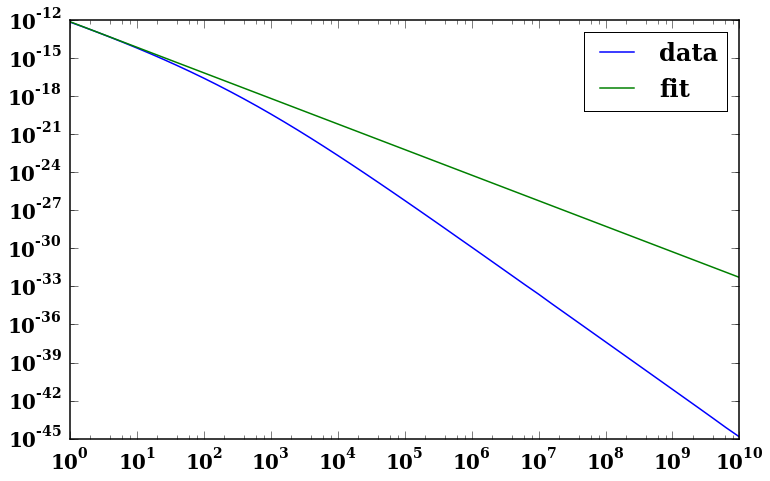

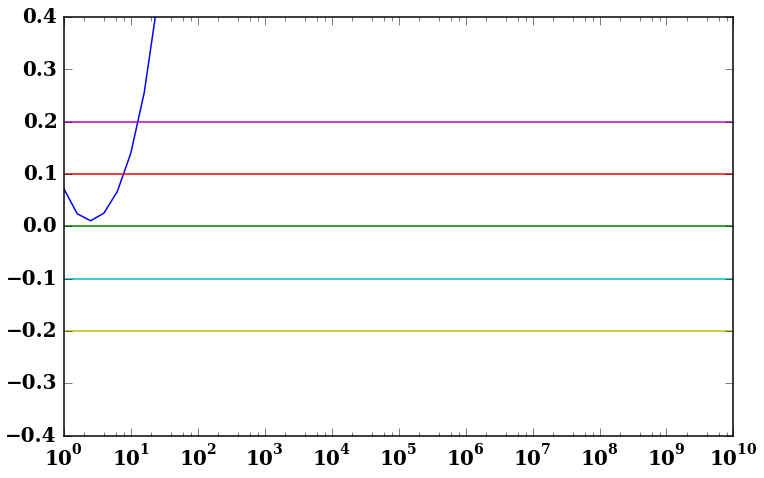

In [252]:
x_8 = data_kappa_V_anu_3_5_B_30_T_3_theta_60[:,0]
y_8 = -data_kappa_V_anu_3_5_B_30_T_3_theta_60[:,1]

AA = 1.5e-20

BB = -0.35

B_DEPEN = 1.

W_DEPEN_LO = 1.03974548e+01 * w**(-1.02658415e+00) + (-9.04235612e-05) * w + 1.98726416e-02

THETA_DEPEN_LO = 1.

def anu_low_8(nuratio):
    
    nu = nuratio * nu_c
    
    X = nu/nu_k
    
    f = THETA_DEPEN_LO * W_DEPEN_LO * B_DEPEN * AA * anu_low(nuratio) * X**BB
    return f

pl.loglog(x_8, y_8, label = 'data')
pl.loglog(x_8, anu_low_8(x_8), label = 'fit')

pl.legend()
pl.show()


pl.semilogx(x_8, anu_low_8(x_8)/y_8 - 1.)

pl.semilogx(x_8, 0*x_8)
pl.semilogx(x_8, 0*x_8 + 0.1)
pl.semilogx(x_8, 0*x_8 - 0.1)
pl.semilogx(x_8, 0*x_8 + 0.2)
pl.semilogx(x_8, 0*x_8 - 0.2)
pl.ylim([-0.4,0.4])


pl.legend()
pl.show()

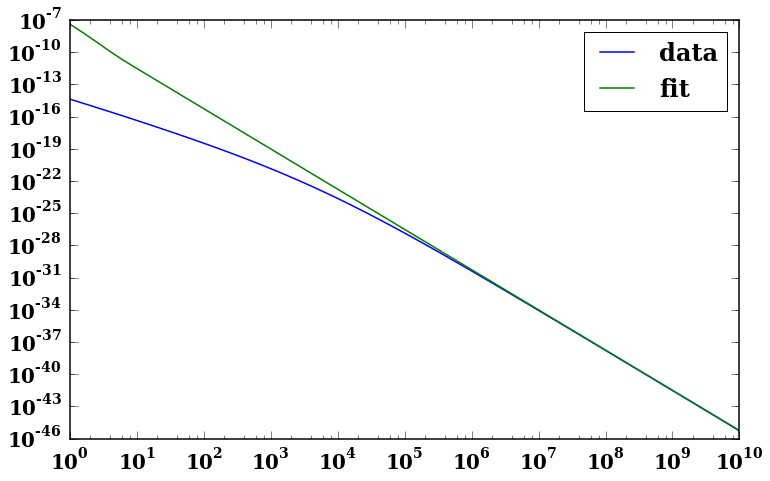

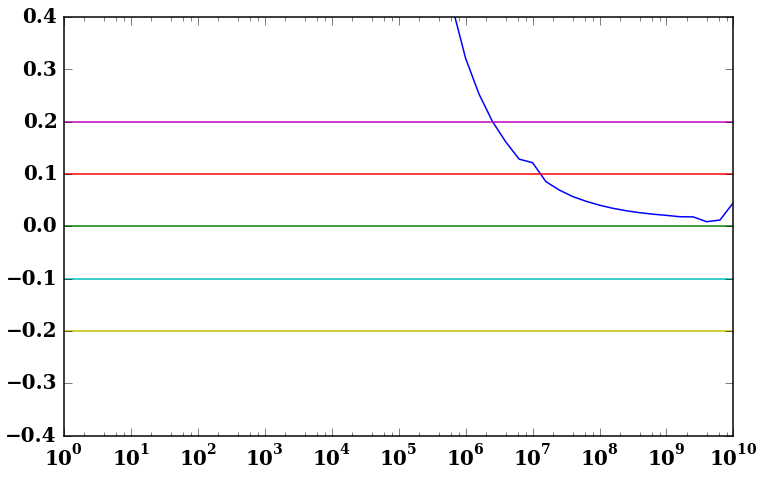

In [151]:
x_9 = data_kappa_V_anu_3_5_B_500_T_10_theta_60[:,0]
y_9 = -data_kappa_V_anu_3_5_B_500_T_10_theta_60[:,1]

CC = 1.66663742e+02 * kappa**(-7.00758904e+00) + 5.21904290e-03 * kappa**2. + (-5.25819444e-02) * kappa + 2.35122131e-01

DD = -50./100.

B_DEPEN_HI = 1.

W_DEPEN_HI = 1.

THETA_DEPEN_HI = 1.

def anu_high_9(nuratio):
    
    nu = nuratio * nu_c
    
    X = nu/nu_k
    
    f = THETA_DEPEN_HI * W_DEPEN_HI * B_DEPEN_HI * CC * anu_high(nuratio) * X**DD
    
    return f


pl.loglog(x_9, y_9, label = 'data')
pl.loglog(x_9, anu_high_9(x_9), label = 'fit')

pl.legend()
pl.show()

pl.semilogx(x_9, anu_high_9(x_9)/y_9 - 1.)

pl.semilogx(x_9, 0*x_9)
pl.semilogx(x_9, 0*x_9 + 0.1)
pl.semilogx(x_9, 0*x_9 - 0.1)
pl.semilogx(x_9, 0*x_9 + 0.2)
pl.semilogx(x_9, 0*x_9 - 0.2)

pl.ylim([-0.4, 0.4])

pl.legend()
pl.show()


(array([  1.66663742e+02,  -7.00758904e+00,   5.21904290e-03,
        -5.25819444e-02,   2.35122131e-01]), array([[  8.07254273e+04,  -4.91351413e+02,   3.82434677e-01,
         -4.83380095e+00,   1.53219198e+01],
       [ -4.91351413e+02,   2.99435276e+00,  -2.36299485e-03,
          2.98295508e-02,  -9.44166719e-02],
       [  3.82434677e-01,  -2.36299485e-03,   2.27501794e-06,
         -2.80675830e-05,   8.66319128e-05],
       [ -4.83380095e+00,   2.98295508e-02,  -2.80675830e-05,
          3.47471198e-04,  -1.07627461e-03],
       [  1.53219198e+01,  -9.44166719e-02,   8.66319128e-05,
         -1.07627461e-03,   3.34629475e-03]]))


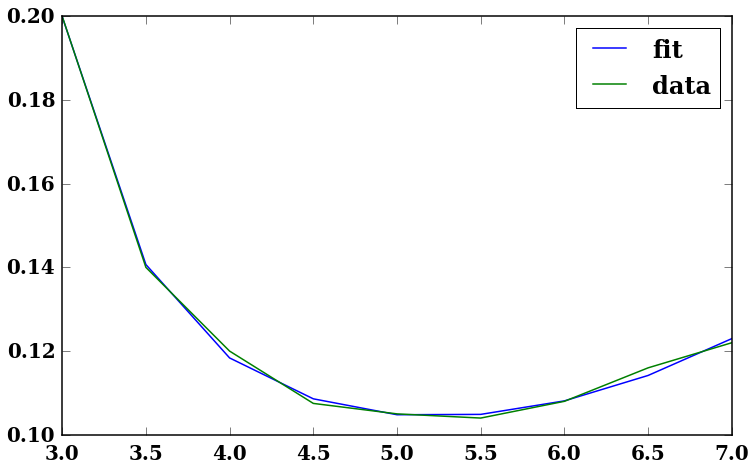

In [106]:
data_kappa_V_anu_high_CC = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_high_CC.txt')

x_10 = data_kappa_V_anu_high_CC[:,0]
y_10 = data_kappa_V_anu_high_CC[:,1]


def func_115(x, a, b, d, h, g):
    f = a * x**b + d * x**2 + h * x  + g
    return f

print curve_fit(func_115, x_10, y_10, p0 = [1.66664817e+02,  -7.00759560e+00,   5.21904823e-03,-5.25820114e-02,   2.35122343e-01])

pl.plot(x_10, func_115(x_10, 1.66663742e+02,  -7.00758904e+00,   5.21904290e-03,-5.25819444e-02,   2.35122131e-01), label = 'fit')

pl.plot(x_10, y_10, label = 'data')

pl.legend()

#pl.ylim([8000, 18000])


(array([  1.03974548e+01,  -1.02658415e+00,  -9.04235612e-05,
         1.98726416e-02]), array([[  1.85749378e-02,  -1.76012407e-03,  -8.88402265e-06,
          1.84374569e-03],
       [ -1.76012407e-03,   1.92692550e-04,   1.25827338e-06,
         -2.43630795e-04],
       [ -8.88402265e-06,   1.25827338e-06,   1.56868341e-08,
         -2.16482908e-06],
       [  1.84374569e-03,  -2.43630795e-04,  -2.16482908e-06,
          3.87750397e-04]]))


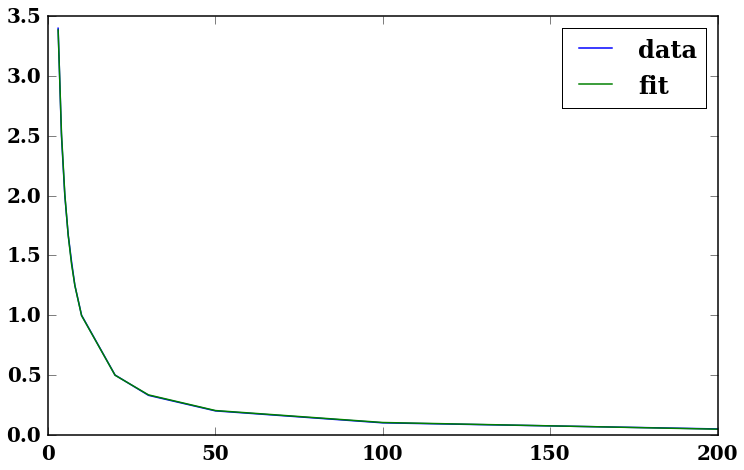

In [243]:
data_kappa_V_anu_low_W_DEPEN = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_low_W_DEPEN.txt')
x_173 = data_kappa_V_anu_low_W_DEPEN[:,0]
y_173 = data_kappa_V_anu_low_W_DEPEN[:,1]

def func_173(x,a,b, d, f):
    f = a * x**b + d * x + f
    return f

print curve_fit(func_173, x_173, y_173, p0 = [ 1.03974541e+01,  -1.02658406e+00,  -9.04224072e-05,1.98724878e-02])

pl.plot(x_173, y_173, label = 'data')

pl.plot(x_173, func_173(x_173, 1.03974548e+01,  -1.02658415e+00,  -9.04235612e-05,1.98726416e-02), label = 'fit')

pl.legend()
